# Библиотеки

In [2907]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import ast
import re
from datetime import datetime
from collections import Counter

# Функции

In [2908]:
"Определяем кол-во пропущенных значений"
def missing_values(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * mis_val / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("В таблице " + str(df.shape[1]) + " столбцов.\n"      
            "из них " + str(mis_val_table_ren_columns.shape[0]) +
              " столбца имеют пропущенные значения.")
        return mis_val_table_ren_columns

In [2909]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='Rating', 
                data=df.loc[df.loc[:, column].isin(df.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [2910]:
def get_first_substring(x):
    if (x!=None and x!=np.nan):
        return x.split(',')[0]

In [2911]:
def find_item(cell):
    if item in cell:
        return 1
    return 0

# Загрузка Pandas и очистка данных

### Датасет состоит из десяти столбцов, содержащих следующую информацию:

* **Restaurant_id** — идентификационный номер ресторана / сети ресторанов;
* **City** — город, в котором находится ресторан;
* **Cuisine Style** — кухня или кухни, к которым можно отнести блюда, предлагаемые в ресторане;
* **Ranking** — место, которое занимает данный ресторан среди всех ресторанов своего города;
* **Rating** — рейтинг ресторана по данным TripAdvisor (именно это значение должна будет предсказывать модель);
* **Price Range** — диапазон цен в ресторане;
* **Number of Reviews** — количество отзывов о ресторане;
* *** **Reviews** — данные о двух отзывах, которые отображаются на сайте ресторана;
* **URL_TA** — URL страницы ресторана на TripAdvosor;
* **ID_TA** — идентификатор ресторана в базе данных TripAdvisor.

In [2912]:
warnings.filterwarnings('ignore') # запретим оповещения

df = pd.read_csv('main_task.csv', encoding = 'UTF-8')
towns_date = pd.read_csv('world-cities_csv.csv', delimiter = ';', encoding = 'UTF-8')

# добавим в таблицу информацию о странах и населении городов, рестораны которых учитываются

In [2913]:
# изменим название колонки для удобства merge

towns_date = towns_date.rename(columns={'name': 'City'})

In [2914]:
# объеденим таблицы

df = pd.merge(df, towns_date, on='City', how='left')

In [2915]:
df

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,country,geonameid
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,France,2988507
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,Sweden,2673730
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,Canada,6058560
3,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,United Kingdom,2643743
4,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,Germany,2950159
...,...,...,...,...,...,...,...,...,...,...,...,...
60111,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,4.5,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,Italy,3173435
60112,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,3.5,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,France,2988507
60113,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,4.5,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,Sweden,2673730
60114,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,4.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,Poland,756135


### Посмотрим, какие значения содержат  `столбцы`

1. ``Restaurant_id``

In [2916]:
df['Restaurant_id'].nunique()

11909

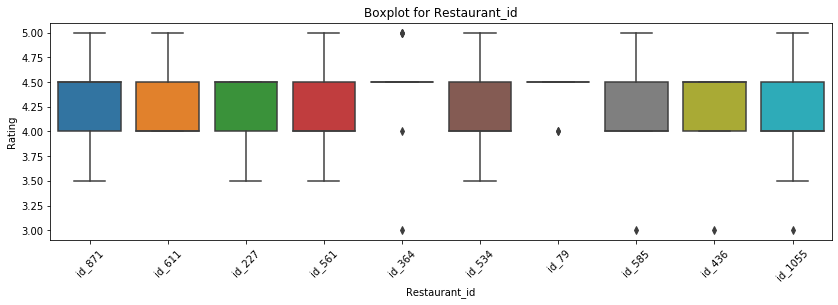

In [2917]:
for col in ['Restaurant_id']:
    get_boxplot(col)

In [2918]:
# Удалим нечисловые знаки
df['Restaurant_id'] = df['Restaurant_id'].str.replace(r'\D','')

In [2919]:
# Преобразуем в числовой вид

df['Restaurant_id'] = pd.to_numeric(df['Restaurant_id'])

2. ``City``

In [2920]:
df['City'].nunique()

31

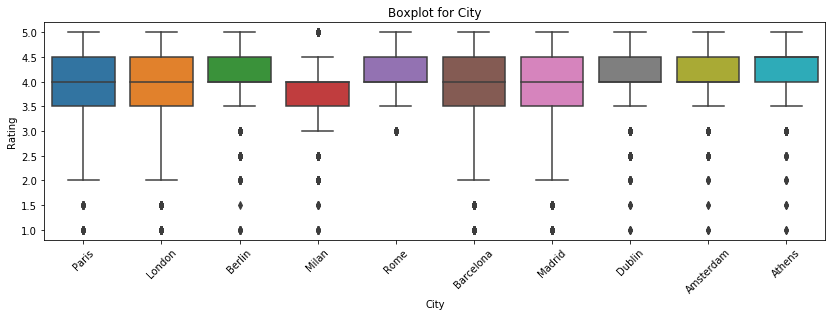

In [2921]:
for col in ['City']:
    get_boxplot(col)

3. ``Cuisine Style``

In [2922]:
# удалим лишние знаки

df['Cuisine Style'] = df['Cuisine Style'].str.replace(r"['\[\]\ ]",'')

In [2923]:
# заполним пустые ячейки значением other

df['Cuisine Style'] = df['Cuisine Style'].fillna('other')

In [2924]:
# разобьем строки

df['Cuisine Style'] = df['Cuisine Style'].str.split(',')

In [2925]:
# преобразуем датафрейм в словарь

dictionary = df.to_dict('records')

In [2926]:
# создадим список уникальных названий кухонь

kitchens = set()
for i in dictionary:
    for j in i['Cuisine Style']:
        kitchens.add(j)

In [2927]:
# создадим столбцы для каждого вида кухни

for item in kitchens:
    df[item] = df['Cuisine Style'].apply(find_item)
    

In [2928]:
# заменим значение на кол-во кухонь

df['Cuisine Style'] = df['Cuisine Style'].apply(lambda x: len(x))

4. ``Ranking``

In [2929]:
df['Ranking'].value_counts()

228.0      26
491.0      26
80.0       26
437.0      25
590.0      25
           ..
9893.0      1
10593.0     1
11141.0     1
12624.0     1
3146.0      1
Name: Ranking, Length: 11936, dtype: int64

5. ``Rating``

In [2930]:
df['Rating'].value_counts()

4.0    20693
4.5    16611
3.5    10162
5.0     5948
3.0     4235
2.5     1305
2.0      650
1.0      298
1.5      214
Name: Rating, dtype: int64

6. ``Price Range``

In [2931]:
df['Price Range'].value_counts()

$$ - $$$    28207
$           10027
$$$$         2081
Name: Price Range, dtype: int64

In [2932]:
# переименуем значения

df['Price Range'] = df['Price Range'].replace('$$ - $$$','median')
df['Price Range'] = df['Price Range'].replace('$','low')
df['Price Range'] = df['Price Range'].replace('$$$$','high')

In [2933]:
#заменим отсутствующее значение

df['Price Range'] = df['Price Range'].fillna('unknown')

In [2934]:
df['Price Range'].value_counts()

median     28207
unknown    19801
low        10027
high        2081
Name: Price Range, dtype: int64

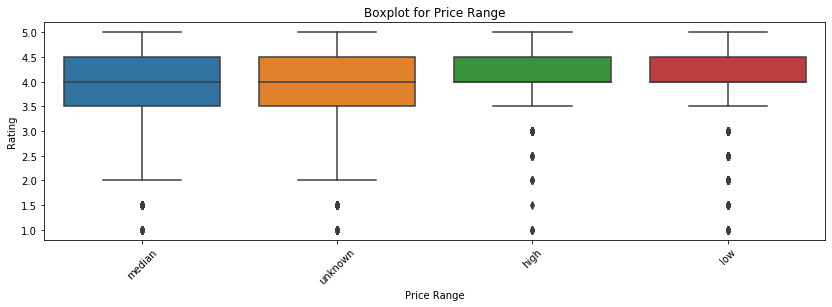

In [2935]:
for col in ['Price Range']:
    get_boxplot(col)

7. ``Number of Reviews``

In [2936]:
df['Number of Reviews'].value_counts()

2.0       2731
3.0       2309
4.0       1965
5.0       1756
6.0       1440
          ... 
2043.0       1
2140.0       1
1026.0       1
1123.0       1
952.0        1
Name: Number of Reviews, Length: 1459, dtype: int64

In [2937]:
# Заполним пропущенные значения в Number of Reviews средними значениями

df['Number of Reviews'] = df['Number of Reviews'].fillna(df['Number of Reviews'].mean())

In [2938]:
# добавим показатель рейтинга на 1 отзыв

df['rating_per_one_review'] = df['Rating'] / df['Number of Reviews']

In [2939]:
# добавим кол-во отзывов на 1го жителя

df['reviews_per_citizen'] = df['geonameid'] / df['Number of Reviews']

In [2940]:
df.drop(['geonameid'], axis='columns', inplace=True)

In [2941]:
df.drop(['country'], axis='columns', inplace=True)

8. ``Reviews``

In [2942]:
# создадим новые столбцы с датами отзывов

df['older_review'] = df['Reviews'].str.extract(r'(\d{2}/\d{2}/\d{4})')
df['earlier_review'] = df['Reviews'].str.extract(r'(\,\ \'\d{2}/\d{2}/\d{4})')

In [2943]:
# удалим лишние символы из столбца

df['earlier_review'] = df['earlier_review'].str.replace(r'\,\ \'','')

In [2944]:
# заполним пустые ячейки значением nan

df[['older_review', 'earlier_review']] = df[['older_review', 'earlier_review']].fillna(-1)

In [2945]:
# преобразуем в unixtime

df['older_review'] = pd.to_datetime(df['older_review']).astype('int64')
df['earlier_review'] = pd.to_datetime(df['earlier_review']).astype('int64')

In [2946]:
# создадим новый столбец с разницей между более новыми и старыми отзывами

df['time_between_review'] = df['older_review'] - df['earlier_review']

9. ``URL_TA``

In [2947]:
# Удалим нечисловые знаки из строк

df['ID_TA'] = df['ID_TA'].str.replace(r'\D','')

In [2948]:
# приведем значения к int
df['ID_TA'] = pd.to_numeric(df['ID_TA'])

9. ``ID_TA``

In [2949]:
df['ID_TA'].nunique()

39980

In [2950]:
# Столбцы `URL_TA`, `ID_TA` фактически дублируют друг-друга, 
#так как содержат различные типы идентификаторов ресторана. Удалим один из них

df.drop(['URL_TA'], axis='columns', inplace=True)

In [2951]:
df.drop(['Reviews'], axis='columns', inplace=True)

### Пропущенные значения

In [2952]:
# Проверим кол-во пропущенных значений
missing_values(df)

В таблице 139 столбцов.
из них 0 столбца имеют пропущенные значения.


,Missing Values,% of Total Values


In [2953]:
# полная матрица корреляций
# используем метод Pandas corr()
df.corr(method='pearson')

,Restaurant_id,Cuisine Style,Ranking,Rating,Number of Reviews,ID_TA,Bangladeshi,Japanese,Czech,African,...,Argentinean,Filipino,Norwegian,Latvian,Seafood,rating_per_one_review,reviews_per_citizen,older_review,earlier_review,time_between_review
Restaurant_id,1.000000,-0.335190,1.000000,-0.382944,-0.232629,0.059536,0.041915,-0.000670,-0.052887,0.004593,...,-0.027045,-0.007879,-0.030306,-0.002986,-0.079058,0.186907,0.302518,-0.098759,-0.140694,0.085859
Cuisine Style,-0.335190,1.000000,-0.335145,0.121314,0.387928,-0.224537,0.068875,0.105675,0.060444,0.016965,...,0.051525,0.012776,0.036316,0.007262,0.190833,-0.358998,-0.348439,0.306446,0.410050,-0.227903
Ranking,1.000000,-0.335145,1.000000,-0.382983,-0.232649,0.059533,0.041942,-0.000682,-0.052834,0.004592,...,-0.027048,-0.007883,-0.030309,-0.002987,-0.079077,0.186917,0.302562,-0.098646,-0.140578,0.085826
Rating,-0.382944,0.121314,-0.382983,1.000000,0.029034,0.160260,-0.001085,-0.013981,-0.003407,0.017568,...,0.013103,0.008827,0.001849,0.006125,0.016316,0.165080,0.010507,0.021204,0.009048,0.012296
Number of Reviews,-0.232629,0.387928,-0.232649,0.029034,1.000000,-0.281778,-0.000160,-0.000155,0.013626,-0.007929,...,0.025069,-0.002885,-0.000038,-0.001739,0.122573,-0.253726,-0.241053,0.138560,0.186151,-0.104131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rating_per_one_review,0.186907,-0.358998,0.186917,0.165080,-0.253726,0.323697,-0.007950,-0.040983,-0.002540,-0.002111,...,-0.022191,-0.002718,-0.005754,0.005434,-0.084999,1.000000,0.886864,-0.271933,-0.349964,0.182042
reviews_per_citizen,0.302518,-0.348439,0.302562,0.010507,-0.241053,0.286099,0.000223,-0.039911,-0.008708,-0.004063,...,-0.022002,-0.003456,-0.006812,0.003067,-0.077197,0.886864,1.000000,-0.232680,-0.292056,0.145030
older_review,-0.098759,0.306446,-0.098646,0.021204,0.138560,-0.236806,0.018761,0.026762,0.009952,0.008906,...,0.010832,0.003179,0.013630,0.001695,0.058520,-0.271933,-0.232680,1.000000,0.731336,0.137489
earlier_review,-0.140694,0.410050,-0.140578,0.009048,0.186151,-0.306389,0.024240,0.034139,0.012351,0.008918,...,0.017004,0.003009,0.015960,0.002500,0.077607,-0.349964,-0.292056,0.731336,1.000000,-0.574990


#### Преобразуем значения столбцов `City` и `Price Range` в dummy

1. `City`

In [2954]:
df['City'].nunique()

31

In [2955]:
city_dummies = pd.get_dummies(df['City'], drop_first=True)

In [2956]:
df = pd.concat([df, city_dummies], axis=1)  

In [2957]:
df.drop(['City'], axis='columns', inplace=True)

2. `Price Range`

In [2958]:
df['Price Range'].value_counts()

median     28207
unknown    19801
low        10027
high        2081
Name: Price Range, dtype: int64

In [2959]:
price_dummies = pd.get_dummies(df['Price Range'], drop_first=False)

In [2960]:
df = pd.concat([df, price_dummies], axis=1)  

In [2961]:
df.drop(['Price Range'], axis='columns', inplace=True)

# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [2962]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = df.drop(['Restaurant_id', 'Rating'], axis = 1)
y = df['Rating']

In [2963]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [2964]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Создаём, обучаем и тестируем модель

In [2965]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [2966]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [2967]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.08486958546809499
